In [2]:
import subprocess
import pydot
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import time

Код для замера времени исполнения генерации

In [177]:
def measure_execution_time(program, num_vertices, num_trials):
    total_time = 0
    for _ in range(num_trials):
        start_time = time.time()
        subprocess.run([program, str(num_vertices)], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
        end_time = time.time()
        execution_time = end_time - start_time
        total_time += execution_time
        #print(execution_time)
    average_time = total_time / num_trials
    return average_time

#subprocess.run(["g++", "-std=c++17", "-O3", "-march=native", "-o", "a", "prufer_prod.cpp"], check=True)
program_name = "a.exe"
num_vertices = 10000
num_trials = 10
average_execution_time = measure_execution_time(program_name, num_vertices, num_trials)
print(f"Average execution time over {num_trials} trials: {average_execution_time:.6f} seconds")

Average execution time over 10 trials: 1.456449 seconds


Average execution time over 100 trials: 0.032106 seconds

Демонстрация генератора

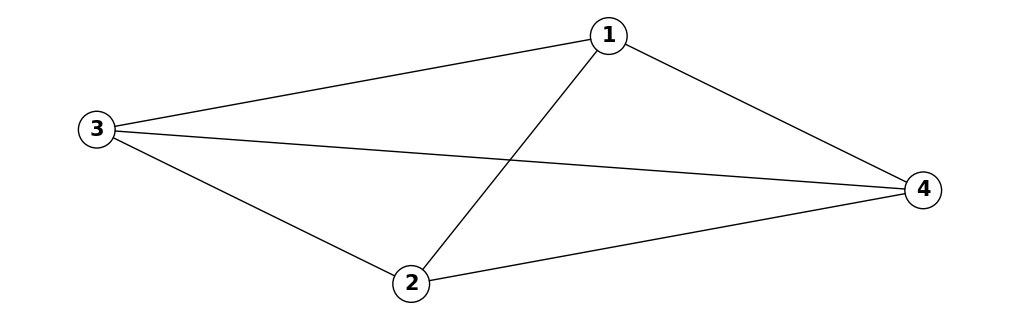

In [379]:
# Компиляция prufer.cpp с помощью g++
#subprocess.run(["g++", "-std=c++17", "-O3", "-march=native", "-o", "a", "prufer_prod.cpp"], check=True)
# Запуск a.exe и ожидание завершения
subprocess.run(["a.exe", "4"], check=True)

# Загружаем граф из файла в формате dot с помощью networkx и pydot
G = nx.nx_pydot.read_dot('graph.dot')

# Рисуем дерево
plt.figure(figsize=(10, 3))
nx.draw(G, 
        with_labels=True, 
        node_size=700,
        node_color="none",
        edgecolors="black",
        font_size=15, 
        font_weight='bold', 
        edge_color='black', 
        font_color='black') 
plt.show()

Построение гистограммы

Построение гистограммы

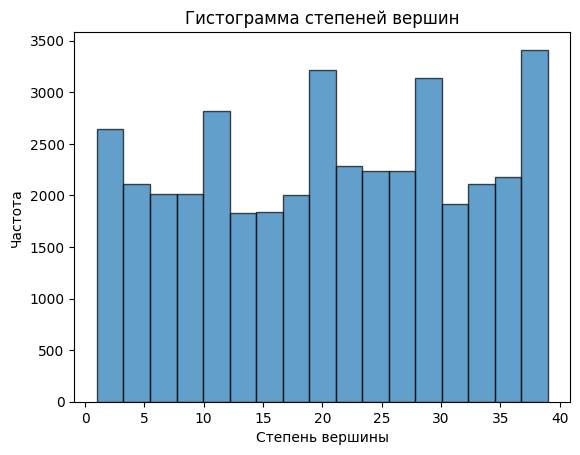

In [ ]:
import subprocess
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import math

# Функция для чтения рёбер из файла DOT
def read_dot_edges(dot_file):
    edges = []
    with open(dot_file, 'r') as f:
        for line in f:
            if '--' in line:
                parts = line.strip().strip(';').split(' -- ')
                if len(parts) == 2:
                    edges.append(tuple(map(int, parts)))
    return edges

# Количество вершин
n = 40

# Количество испытаний
trials = 1000

# Список для хранения степеней всех вершин во всех испытаниях
all_degrees = []

for i in range(trials):
    # Запускаем генерацию графа
    subprocess.run(["./a.exe", str(n)], check=True)

    # Читаем рёбра из файла
    edges = read_dot_edges('graph.dot')

    # Подсчитываем степени вершин
    degree_count = defaultdict(int)  # Сброс перед каждым испытанием
    for u, v in edges:
        degree_count[u] += 1
        degree_count[v] += 1

    # Добавляем степени всех вершин в общий список
    all_degrees.extend(degree_count.values())

# Определяем диапазон значений степеней вершин
min_degree = min(all_degrees)
max_degree = max(all_degrees)

# Используем логарифмическую оценку для количества бинов
num_bins = math.ceil(math.log2(len(all_degrees)) + 1)

# Строим гистограмму степеней вершин
plt.hist(all_degrees, bins=num_bins, edgecolor='black', alpha=0.7)
plt.title('Гистограмма степеней вершин')
plt.xlabel('Степень вершины')
plt.ylabel('Частота')
plt.show()

In [416]:
degrees

[19,
 19,
 20,
 19,
 20,
 20,
 19,
 20,
 19,
 19,
 20,
 20,
 19,
 20,
 19,
 20,
 20,
 19,
 20,
 20,
 19,
 20,
 20,
 19,
 20,
 20,
 20,
 19,
 19,
 20,
 19,
 20,
 20,
 19,
 20,
 20,
 19,
 20,
 20,
 19]